In [142]:
import numpy as np
import pandas as pd
import re
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib as plt
from random import randint
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [94]:
zf = pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_Train.xlsx')
#test= pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_Test.xlsx')

In [95]:
zf['LicenseNo'].duplicated().any()
#test['LicenseNo'].duplicated().any()

True

In [96]:
cols_to_drop = [
    'Date',
    'ID'
    ]

zf = zf.drop(cols_to_drop, axis=1)


In [97]:
zf.head(3)

,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6


In [98]:
total = zf.isnull().sum().sort_values(ascending=False)
percent_1 = zf.isnull().sum()/zf.isnull().count()*100
percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
missing_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
City,0,0.0
FacilityID,0,0.0
FacilityName,0,0.0
Geo_Loc,0,0.0
Inspection_Results,0,0.0
LicenseNo,0,0.0
LocationID,35,0.0
Reason,0,0.0
RiskLevel,0,0.0
SectionViolations,39068,26.5


In [99]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df = imp.fit_transform(zf)


In [100]:
dataframe = pd.DataFrame.from_records(df)

In [101]:
dataframe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,32.0,High,locid3368,6


In [102]:
dataframe.rename(columns = { 0:'LicenseNo',1:'FacilityID',2:'FacilityName', 3:'Type',4:'Street',5:'City',6:'State',7:'LocationID',8:'Reason',9:'SectionViolations',10:'RiskLevel',11:'Geo_Loc',12:'Inspection_Results'},inplace=True)


In [111]:
dataframe.shape

(147443, 13)

In [87]:
# dataframe = pd.get_dummies(dataframe, prefix="RiskLevel",columns=['RiskLevel'])
# dataframe = pd.get_dummies(dataframe, prefix="City",columns=['City'])
# dataframe = pd.get_dummies(dataframe, prefix="State",columns=['State'])
# dataframe = pd.get_dummies(dataframe, prefix="Reason",columns=['Reason'])

In [105]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
dataframe['Type']= label_encoder.fit_transform(dataframe['Type']) 
dataframe['Geo_Loc'] = label_encoder.fit_transform(dataframe['Geo_Loc'])
dataframe['FacilityID'] = label_encoder.fit_transform(dataframe['FacilityID'])
dataframe['FacilityName'] = label_encoder.fit_transform(dataframe['FacilityName'])
dataframe['LocationID'] = label_encoder.fit_transform(dataframe['LocationID'])
dataframe['SectionViolations'] = label_encoder.fit_transform(dataframe['SectionViolations'])
dataframe['LicenseNo'] = label_encoder.fit_transform(dataframe['LicenseNo'])



In [107]:
data =dataframe.drop(['Inspection_Results'] , axis =1)

In [114]:
dataframe.head(3)
print(data.shape)
print(dataframe['Inspection_Results'].shape)

(147443, 12)
(147443,)


In [116]:
smote_nc = SMOTENC(categorical_features=[3,5,6,8,9,10,], random_state=0) 

X_resampled, y_resampled = smote_nc.fit_resample(data,dataframe['Inspection_Results'])
print(sorted(Counter(y_resampled).items()))

[(0, 79453), (1, 79453), (2, 79453), (3, 79453), (4, 79453), (5, 79453), (6, 79453)]


In [118]:
ndataframe = pd.concat([X_resampled,y_resampled] , axis =1)

In [120]:
ndataframe = pd.get_dummies(ndataframe, prefix="RiskLevel",columns=['RiskLevel'])
ndataframe = pd.get_dummies(ndataframe, prefix="City",columns=['City'])
ndataframe = pd.get_dummies(ndataframe, prefix="State",columns=['State'])
ndataframe = pd.get_dummies(ndataframe, prefix="Reason",columns=['Reason'])

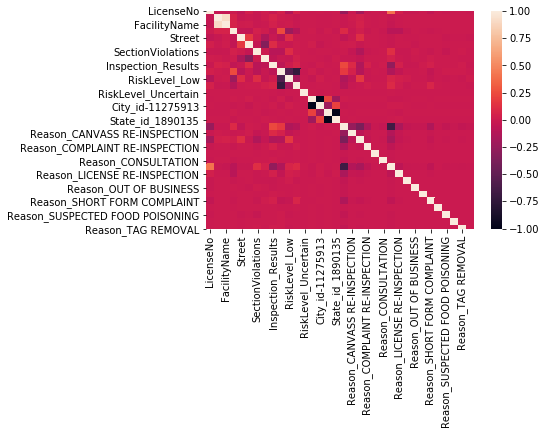

In [122]:
plt.figure()
sns.heatmap(ndataframe.corr())

In [123]:
ndataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556171 entries, 0 to 556170
Data columns (total 34 columns):
LicenseNo                                        556171 non-null int64
FacilityID                                       556171 non-null int64
FacilityName                                     556171 non-null int64
Type                                             556171 non-null int64
Street                                           556171 non-null int64
LocationID                                       556171 non-null int64
SectionViolations                                556171 non-null int64
Geo_Loc                                          556171 non-null int64
Inspection_Results                               556171 non-null int64
RiskLevel_High                                   556171 non-null uint8
RiskLevel_Low                                    556171 non-null uint8
RiskLevel_Medium                                 556171 non-null uint8
RiskLevel_Uncertain                  

In [125]:
ndataframe.describe()

,LicenseNo,FacilityID,FacilityName,Type,Street,LocationID,SectionViolations,Geo_Loc,Inspection_Results,RiskLevel_High,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
count,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,...,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000,556171.000000
mean,17000.988302,12748.852376,12248.705760,302.672743,8762.641817,65.189967,25.375210,8419.720426,3.000000,0.711181,...,0.015610,0.001334,0.000606,0.000451,0.012534,0.000138,0.001266,0.000264,0.001063,0.000466
std,10167.136245,7219.245617,6816.667604,61.249299,5159.693825,15.077612,10.690548,4693.787220,2.000002,0.453214,...,0.123962,0.036501,0.024608,0.021239,0.111251,0.011766,0.035556,0.016255,0.032581,0.021575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8288.000000,6486.000000,6381.000000,326.000000,4264.000000,52.000000,20.000000,4320.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17003.000000,12605.000000,12414.000000,326.000000,8540.000000,63.000000,31.000000,8392.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26027.000000,19121.000000,18047.000000,326.000000,13347.000000,77.000000,31.000000,12821.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34383.000000,25534.000000,24347.000000,408.000000,17891.000000,103.000000,60.000000,16315.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 


In [126]:
Y = ndataframe['Inspection_Results']
X = ndataframe.drop('Inspection_Results', axis =1)
S = X.copy()

In [127]:

S = scaler.fit_transform(S)
  


In [128]:
S


array([[-1.25876151, -0.72027707, -0.74695007, ..., -0.01625968,
        -0.03261523, -0.02158474],
       [-1.41298404, -0.18199319, -0.20298877, ..., -0.01625968,
        -0.03261523, -0.02158474],
       [-0.03462023, -1.62425045, -1.66792877, ..., -0.01625968,
        -0.03261523, -0.02158474],
       ...,
       [ 1.18784899,  0.79317883,  1.06229336, ..., -0.01625968,
        -0.03261523, -0.02158474],
       [-1.35662593,  1.38603909,  1.3844452 , ..., -0.01625968,
        -0.03261523, -0.02158474],
       [ 1.44859128,  1.06661485,  1.06786794, ..., -0.01625968,
        -0.03261523, -0.02158474]])

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [130]:
X_train.describe()

,LicenseNo,FacilityID,FacilityName,Type,Street,LocationID,SectionViolations,Geo_Loc,RiskLevel_High,RiskLevel_Low,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
count,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,...,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.000000,389319.00000,389319.000000,389319.000000
mean,17015.552501,12743.152066,12244.523370,302.656462,8761.976880,65.171412,25.379622,8417.693755,0.711399,0.112227,...,0.015609,0.001374,0.000557,0.000429,0.012404,0.000131,0.001197,0.00027,0.001063,0.000467
std,10167.256866,7214.703339,6813.194989,61.291252,5158.044669,15.065607,10.687953,4692.873636,0.453113,0.315646,...,0.123958,0.037045,0.023602,0.020707,0.110679,0.011445,0.034576,0.01642,0.032592,0.021616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8310.000000,6476.000000,6378.000000,326.000000,4269.000000,52.000000,20.000000,4316.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,17026.000000,12610.000000,12417.000000,326.000000,8543.000000,63.000000,31.000000,8395.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,26037.000000,19097.000000,18021.000000,326.000000,13335.000000,77.000000,31.000000,12818.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,34383.000000,25534.000000,24347.000000,408.000000,17890.000000,103.000000,60.000000,16315.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [131]:
X_train.head()

,LicenseNo,FacilityID,FacilityName,Type,Street,LocationID,SectionViolations,Geo_Loc,RiskLevel_High,RiskLevel_Low,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
458832,17391,13259,12612,75,4474,49,7,12641,1,0,...,0,0,0,0,0,0,0,0,0,0
207498,11315,11567,10974,326,12473,39,31,13875,1,0,...,0,0,0,0,0,0,0,0,0,0
276005,9619,19181,18334,326,14956,74,1,8706,1,0,...,0,0,0,0,0,0,0,0,0,0
232286,33541,18749,17905,326,1916,86,17,15732,1,0,...,0,0,0,0,0,0,0,0,0,0
416645,15485,21486,20480,326,1103,61,31,14687,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(X_test))

389319
389319
166852
166852


In [133]:
print(sorted(Counter(Y_train).items()))

[(0, 55855), (1, 55590), (2, 55625), (3, 55580), (4, 55669), (5, 55490), (6, 55510)]


In [134]:
from xgboost import XGBClassifier

clf1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [136]:
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)
Y_pred1 =clf1.predict(X_test)

In [137]:
clf1.score(X_test,Y_test)

0.792306954666411

In [138]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(Y_test, Y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.87      0.84     23598
     class 1       0.86      0.70      0.77     23863
     class 2       0.86      0.98      0.92     23828
     class 3       0.62      0.73      0.67     23873
     class 4       0.93      0.79      0.85     23784
     class 5       0.79      0.89      0.84     23963
     class 6       0.71      0.57      0.64     23943

    accuracy                           0.79    166852
   macro avg       0.80      0.79      0.79    166852
weighted avg       0.80      0.79      0.79    166852



In [143]:
clf1=xgb.XGBClassifier()
paramsclf1 = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [ ]:
gridclf1 = GridSearchCV(estimator=clf1, param_grid=paramsclf1, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train,Y_train), verbose=3 )
gridclf1.fit(X_train, Y_train)
print('\n All results:')
print(gridclf1.cv_results_)
print('\n Best estimator:')
print(gridclf1.best_estimator_)
print('\n Best score:')
print(gridclf1.best_score_ * 2 - 1)
print('\n Best parameters:')
print(gridclf1.best_params_)
results = pd.DataFrame(gridclf1.cv_results_)
results.to_csv('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/xgb-grid-search-results-011.csv', index=False)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.2min


In [ ]:
############ensemble#####################3

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier

clf5 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=1.0, max_features=1.0, 
                         bootstrap=True,
                         bootstrap_features=False, oob_score=True, warm_start=False,
                         n_jobs=-1, random_state=None, verbose=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

In [ ]:
#####################stacking#######################

In [ ]:
clf1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [ ]:
clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
clf3= LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [ ]:
clf4 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# dataframe.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TrainCLEANED.xlsx")